## Table of Content

1. **[Parameter Estimation](#est)**
2. **[Hypothesis Tests with Z Statistic](#eg)**


**Import the required libraries**

In [1]:
import scipy.stats as stats
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests

In [47]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [20,11]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Let's begin with some hands-on practice exercises

<a id = "est"> </a>
## 1. Parameter Estimation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The production manager at tea emporium wants to estimate the weight of a green tea bag. The previous study shows that the standard deviation of weight is 2.3 g. The manager collects 65 tea bags for the study. How much margin of error the manager should consider to estimate the weight with 99%  confidence. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# sample standard deviation
std = 2.3

# sample number of tea bags
n = 65

# given alpha (1 - confidence %)
alpha = 0.01

# calculate z_alpha_by_2 with (1-alpha) = 0.01
z_alpha_by_2 = round(stats.norm.isf(q = 0.01/2), 4)
print('z_alpha_by_2 =', z_alpha_by_2)

error = (z_alpha_by_2 * std)/np.sqrt(n)

print("Margin of error to estimate weight with 99% confidence is", round(error, 4))

z_alpha_by_2 = 2.5758
Margin of error to estimate weight with 99% confidence is 0.7348


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. The bank manager has received several fraud complaints from past a few weeks. The report from accountant states that the standard deviation in frauds is 16. The manager is ready to consider the margin of error as 5. To estimate the average number of frauds with 90% confidence how many transactions should the manager consider?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# standard deviation
std = 16

# given alpha (1 - confidence %)
alpha = 0.1

# calculate z_alpha_by_2 with (1 - confidence %) = 0.1
z_alpha_by_2 = round(stats.norm.isf(q = 0.1/2), 4)
print('z_alpha_by_2 =', z_alpha_by_2)

# Given error 
margin_error = 5

# error = (z_alpha_by_2 * std)/np.sqrt(n)
n = ((z_alpha_by_2 * std)/margin_error) ** 2
print("Number of transactions to consider to estimate average number of frauds with 90% confidence is", round(n))

z_alpha_by_2 = 1.6449
Number of transactions to consider to estimate average number of frauds with 90% confidence is 28


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. A paediatrician wants to check the amount of sugar in the 100g pack of baby food produced by KidsGrow company. The medical journal states that a standard deviation of sugar in 100g pack is 8g. The paediatrician collects 37 packets of baby food and found that the average sugar is 24g. Find the 90% confidence interval for the population mean.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# standard deviation
sample_std = 8

# sample number of baby food packets
n = 37

# sample mean 
sample_avg = 24

# calculate the 90% confidence interval
interval = stats.norm.interval(0.9, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for the population mean is', interval)

90% confidence interval for the population mean is (21.83670183570907, 26.16329816429093)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. The physical trainer at a university wants to estimate the average height of students at the university. The trainer collects the data of 100 students and found that the average height is 168 cm with a standard deviation of 12 cm. Find the 95% confidence interval for the population average height.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# As the sample size is large (> 30), we use the Z-distribution to calculate the confidence interval.

# standard deviation
sample_std = 12

# sample number of baby food packets
n = 100

# sample mean 
sample_avg = 168

# calculate the 90% confidence interval
interval = stats.norm.interval(0.95, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('95% confidence interval for the population average height is', interval)

95% confidence interval for the population average height is (165.64804321855195, 170.35195678144805)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. The health magazine in Los Angeles states that a person should drink 1.8 L water every day. To study this statement, the physician collects the data of 15 people and found that the average water intake for these people is 1.6 L with a standard deviation of 0.5 L. Calculate the 90% confidence interval for the population average water intake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# As the sample size is small (< 30), we use the t-distribution to calculate the confidence interval.

# standard deviation
sample_std = 0.5

# sample number of baby food packets
n = 15

# sample mean 
sample_avg = 1.6

# calculate the 90% confidence interval using t-distribution
interval = stats.t.interval(0.9, df = n-1, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for the population average water intake is', interval)

90% confidence interval for the population average water intake is (1.3726158392212553, 1.8273841607787449)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. The NY university has opened the post of Astrophysics professor. The total number of applications was 36. To check the authenticity of the applicants a sample of 10 applications was collected, out of which 3 applicants were found to be a fraud. Construct the 95% confidence interval for the population proportion.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# total number of applications
N = 36 

# number of applications considered in sample
n = 10

# number of fraud applications in sample
x = 3

# sample proportion
p_samp = x/n

# Calculate 95% confidence interval using t-distribution
interval = stats.norm.interval(0.95, loc = p_samp, scale = np.sqrt((p_samp * (1 - p_samp))/n))

print('95% confidence interval for the population proportion is', interval)

95% confidence interval for the population proportion is (0.015974234910674623, 0.5840257650893254)


<a id = "eg"> </a>
## 2. Hypothesis Tests with Z Statistic

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. The temperature (in degree Celsius) at Manhattan is recorded for 45 winter days. A student from the Geography department wants to test the claim proposed by the weather department. Check whether the given data satisfies the condition of normality with 99% confidence?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given below:
        
    temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                    3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42,
                    1.36, 2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

In [54]:
temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42, 1.36, 
                2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

stats, p_val = shapiro(temp_winter)
print('Test statistic =', stats, '\nP-value =', p_val)

# for 99% confidence interval, alpha = 0.01
alpha = 0.01

if (p_val > alpha):
    print('\np_val is greater than alpha at 99% confidence level. So the data is normally distributed')
else:
    print('\np_val is lesser than alpha at 99% confidence level. So the data is not normally distributed')

Test statistic = 0.9453739523887634 
P-value = 0.03401985391974449

p_val is greater than alpha at 99% confidence level. So the data is normally distributed


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Use the temperature data given in the previous question. The weather department claims that the average temperature in Manhattan is less than 2.8 degree celsius in winter. Test the department's claim using a critical value method with 99% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given below:
        
    temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                    3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42,
                    1.36, 2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

In [55]:
# given data
temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42, 1.36, 
                2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

* Data is normally distributed from Shapiro-Wilk test in previous question


H<sub>0</sub>: $\mu \geq 2.8 $<br>
H<sub>a</sub>: $\mu < 2.8 $


* Null Hypothesis: The average temp. in Manhattan is greater than or equal to 2.8
* Alternate Hypothesis: The average temp. in Manhattan is less than 2.8


* This is a left-tailed test

In [58]:
xbar = np.mean(temp_winter)
sample_std = np.std(temp_winter)
print('xbar =', xbar)
print('sample_std =', sample_std)

# Given information 
mu = 2.8
alpha = 0.01
n = 45
se = sample_std / np.sqrt(n)

# Calculate Z-score
zscore = round((xbar - mu)/se, 4)
print('\nZ-score =', zscore)


# Calculate Z-score and p-value using Z-test
z_score, pval = stests.ztest(x1 = temp_winter, value = 2.8, alternative = 'smaller')
print("\nZ-score: ", round(z_score, 4))
print("p-value: ", pval)

# Calculate Z-critical at 99% confidence level
z_val = round(stats.norm.isf(0.01), 4)
print('\nCritical value for left-tailed Z-test =', -z_val)

print('\nConfidence interval:', stats.norm.interval(0.99, loc = np.mean(temp_winter), 
                                                  scale = sample_std / np.sqrt(n)))


xbar = 2.2871111111111113
sample_std = 0.7663205660012937

Z-score = -4.4897

Z-score:  -4.4396
p-value:  4.507316464110269e-06

Critical value for left-tailed Z-test = -2.3263

Confidence interval: (1.9928578371080259, 2.5813643851141967)


* Here the z-score is lesser than -2.32 (Z-crit) i.e. z-score falls in rejection region of H0
* p-value is lesser than 0.01
* Also the confidence interval does not contain the value in null hypothesis (2.8)
* Thus we reject the null hypothesis i.e there is no evidence to conclude that avg winter temperature in Manhattan is greater than or equal to 2.8 celsius

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. The production manager at the automobile company states that all the steel rods are produced with an average length of 26 cm and a standard deviation of 2.4 cm. The length of 60 rods is collected as a sample and the average length of these rods is found to be 24.8 cm. Test whether the length of the rod is different than 26 cm with a 95% confidence interval. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu = 26 $<br> 
H<sub>a</sub>: $\mu ≠ 26 $


* Null Hypothesis: The average length of steel rods is equal to 26cm
* Alternate Hypothesis: The average length of steel rods is not equal to 26cm
* This is a two-tailed test

In [59]:
# Given data
mu = 26
samp_mean = 24.8
pop_std = 2.4
n = 60
alpha = 0.05

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n))
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.cdf(zscore)
print('p-value =', p_val * 2)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha/2), 2)
print('\nZ-crit =', zval, 'and', -zval)


# Calculate confidence interval
interval = stats.norm.interval(0.95, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = -3.872983346207415
p-value = 0.00010751117672950135

Z-crit = 1.96 and -1.96

Confidence interval: (24.192727370296804, 25.407272629703197)


* Here the confidence interval does not contain the value in the null hypothesis (i.e. 26)
* Thus we reject the null hypothesis and conclude that there is enough evidence to claim that the length of the rod is different than 26cm.
* The z score is less than -1.96 i.e. z-score falls in rejection region of H0
* p-value is less than alpha (0.05)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. The production manager at tea emporium claims that the weight of a green tea bag is less than 3.5 g. To test the manager's claim consider a sample of 50 tea bags. The sample average weight is found to be 3.28 g with a standard deviation of 0.6 g. Use the p-value technique to test the claim at a 10% level of significance. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu \geq 3.5 $<br>
H<sub>a</sub>: $\mu < 3.5 $


* Null Hypothesis: The weight of a tea bag is greater than or equal to 3.5g
* Alternate Hypothesis: The weight of a tea bag is lesser than 3.5g
* This is a left-tailed test

In [60]:
# Given data
mu = 3.5
samp_mean = 3.28
pop_std = 0.6
n = 50
alpha = 0.1

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n))
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.cdf(zscore)
print('p-value =', p_val)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha), 2)
print('\nZ-crit =', -zval)

 
# Calculate confidence interval
interval = stats.norm.interval(0.9, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = -2.592724864350677
p-value = 0.0047609455920493825

Z-crit = -1.28

Confidence interval: (3.140429541558799, 3.4195704584412008)


* Here the p-value is lesser than alpha (0.1)
* The z-score is lesser than -1.28 (Z-crit) i.e. z-score falls in rejection region of H0
* Also the confidence interval does not contain the value in null hypothesis (3.5)
* Thus we reject the null hypothesis i.e there is no evidence to conclude that avg weight of a green tea bag is greater than or equal to 3.5g

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. The physician at university claims that the average height of male students in the university hostel is more than 175 cm with a standard deviation of 8 cm. To test the claim the physical trainer at a university collects the data of 75 male students in the hostel and calculate the average height of those 75 students as 176.3 cm. Plot the acceptance and rejection region to test the physician's claim at 95% confidence.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu \leq 175 $<br>
H<sub>a</sub>: $\mu > 175 $


* Null Hypothesis: The average height of male students in the univeristy hostel is less than or equal to 175cm
* Alternate Hypothesis: The average height of male students in the univeristy hostel is greater than 175cm
* This is a right-tailed test

In [61]:
# Given data
mu = 175
samp_mean = 176.3
pop_std = 8
n = 75
alpha = 0.05

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n))
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.sf(zscore)
print('p-value =', p_val)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha), 2)
print('\nZ-crit =', zval)


# Calculate confidence interval
interval = stats.norm.interval(0.9, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = 1.4072912811497253
p-value = 0.07967051682425197

Z-crit = 1.64

Confidence interval: (174.78054930512326, 177.81945069487676)


* Here the z-score falls to the left of 1.64 (Z-crit) on the positive tail i.e. z-score falls outside the rejection region of H0
* p-value is greater than alpha (0.05)
* Also the confidence interval contains the value in null hypothesis (175)
* Thus we fail to reject the null hypothesis i.e there is no evidence to conclude that the average height of male students in the univeristy hostel is greater than 175cm

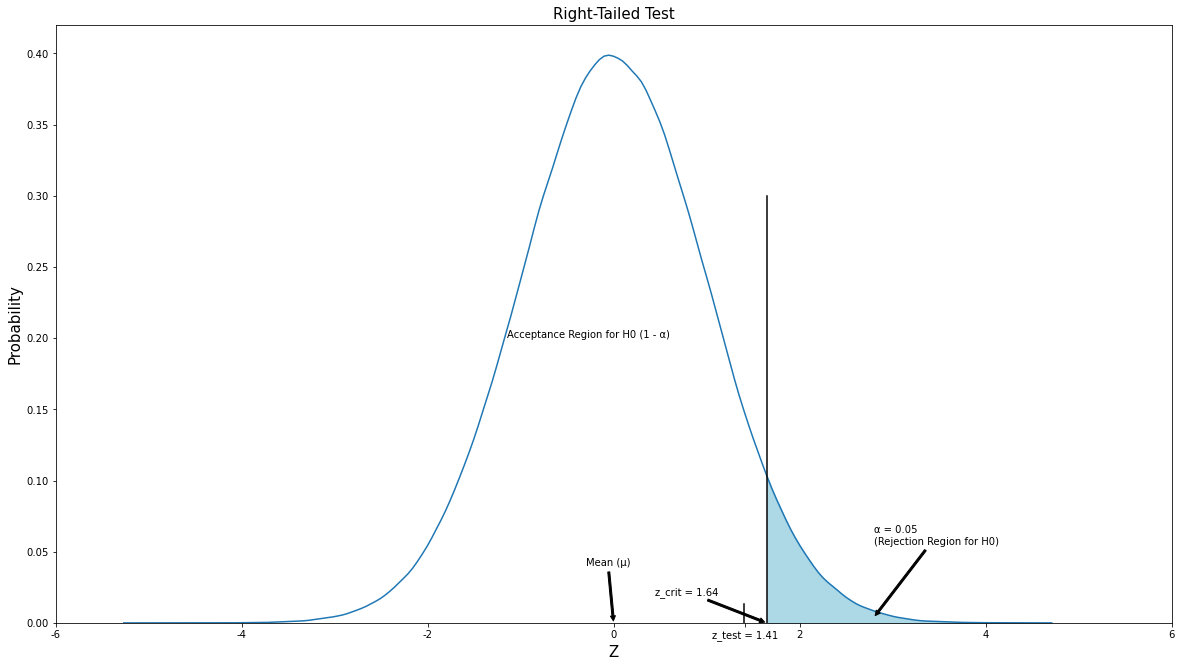

In [62]:
# consider a random variable 'X' that follows a standard normal distribution 
X = stats.norm.rvs(size = 1000000, random_state = 20)

# plot the distribution of X
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# Calculate the critical z-value for alpha = 0.1
z = stats.norm.isf(q = 0.05)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [zscore, zscore], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α = 0.05\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(zscore,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(zscore,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. The quality control department at a soap company states that their herbal soap contains 28 ml of palm oil with a standard deviation of 3.5 ml. A sample of 120 soaps is considered. The average amount of palm oil in the sample is 27.6 ml. Test whether the amount of palm oil is different than 28 ml using the 90% confidence interval. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu = 28 $<br> 
H<sub>a</sub>: $\mu ≠ 28 $


* Null Hypothesis: The amount of palm oil in the herbal soap is equal to 28ml
* Alternate Hypothesis: The amount of palm oil in the herbal soap is not equal to 28ml
* This is a two-tailed test

In [63]:
# Given data
mu = 28
samp_mean = 27.6
pop_std = 3.5
n = 120
alpha = 0.1

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n))
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.cdf(zscore)
print('p-value =', p_val * 2)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha/2), 2)
print('\nZ-crit =', zval, 'and', -zval)


# Calculate confidence interval
interval = stats.norm.interval(0.9, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = -1.251937274297518
p-value = 0.2105927211869113

Z-crit = 1.64 and -1.64

Confidence interval: (27.074461329422622, 28.12553867057738)


* Here the confidence interval contains the value in null hypothesis (28)
* Thus we fail to reject the null hypothesis i.e there is no evidence to conclude that the amount of palm oil in the herbal soap is different than 28ml
* The z-score is greater than -1.64 (Z-crit) i.e. z-score falls outside the rejection region of H0
* p-value is greater than alpha (0.1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. The bank manager claims that the complaints regarding fraud transactions are less than 12 per month with a standard deviation of 3 frauds. To test the claim the sample data for 3 years is collected. The average number of frauds in sample data is 10. Use the critical value method to test the claim with 95% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu \geq 12 $<br>
H<sub>a</sub>: $\mu < 12 $


* Null Hypothesis: The number of fraud transactions per month is greater than or equal to 12
* Alternate Hypothesis: The number of fraud transactions per month is lesser than 12
* This is a left-tailed test

In [64]:
# Given data
mu = 12
samp_mean = 10
pop_std = 3
n = 3*12
alpha = 0.05

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n))
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.cdf(zscore)
print('p-value =', p_val)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha), 2)
print('\nZ-crit =', -zval)


# Calculate confidence interval
interval = stats.norm.interval(0.9, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = -4.0
p-value = 3.167124183311986e-05

Z-crit = -1.64

Confidence interval: (9.177573186524263, 10.822426813475737)


* Here the z-score is lesser than -1.64 (Z-crit) i.e. z-score falls in rejection region of H0
* p-value is lesser than alpha (0.05)
* Also the confidence interval does not contain the value in null hypothesis (12)
* Thus we reject the null hypothesis i.e there is no evidence to conclude that the number of fraud transactions per month is greater than or equal to 12

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. The internet provider claims that their router gives a speed of 25 Mbps with a standard deviation of 4.8 Mbps. The computer engineer wants to check whether the speed is different than what the provider claims. For this study, the engineer collects the speed of 40 routers and found that the average speed is 23.2 Mbps for those 40 routers. Plot the acceptance and rejection region for a two-sided test to test the claim of engineer with 90% confidence.</b>
                </font> 
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu = 25 $<br> 
H<sub>a</sub>: $\mu ≠ 25 $


* Null Hypothesis: The internet speed is equal to 25 Mbps
* Alternate Hypothesis: The internet speed is not equal to 25 Mbps
* This is a two-tailed test

In [65]:
# Given data
mu = 25
samp_mean = 23.2
pop_std = 4.8
n = 40
alpha = 0.1

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n)) 
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.cdf(zscore)
print('p-value =', p_val * 2)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha/2), 2)
print('\nZ-crit =', zval, 'and', -zval)


# Calculate confidence interval
interval = stats.norm.interval(0.9, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = -2.3717082451262854
p-value = 0.01770606580736657

Z-crit = 1.64 and -1.64

Confidence interval: (21.95164386909866, 24.448356130901338)


* p-value is lesser than alpha (0.1)
* The z-score is lesser than -1.64 (Z-crit) i.e. z-score falls in the rejection region of H0
* The confidence interval does not contain the value in null hypothesis (25)
* Thus we reject the null hypothesis i.e there is no evidence to conclude that the internet speed is 25 Mbps

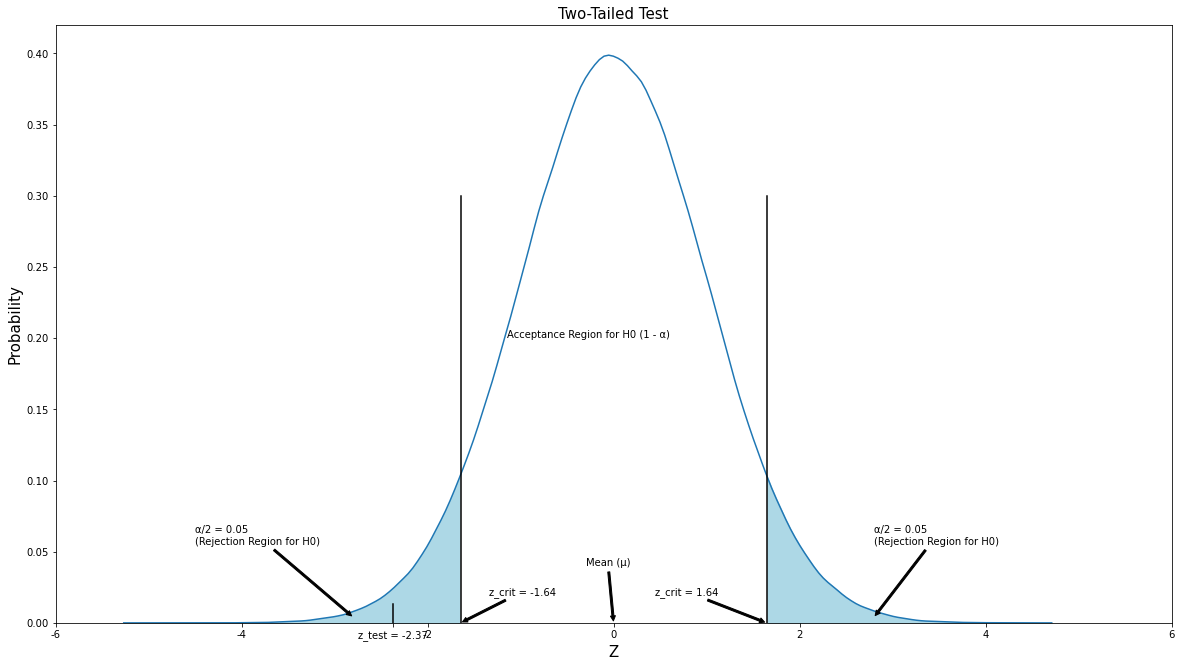

In [66]:
# consider a random variable 'X' that follows a standard normal distribution 
X = stats.norm.rvs(size = 1000000, random_state = 20)

# plot the distribution of X
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# Calculate the critical z-value for alpha = 0.1
z = stats.norm.isf(q = 0.1/2)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(z-value)
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [zscore, zscore], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(zscore,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(zscore,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. The health magazine in New York states that every person in NY drinks more than 1.8 L water every day with a standard deviation of 0.5 L. To test this claim the physician collects the data of 45 people and found that the average water intake for these people is 1.93 L. Use the p-value technique to test the claim with 95% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

H<sub>0</sub>: $\mu \leq 1.8 $<br>
H<sub>a</sub>: $\mu > 1.8 $


* Null Hypothesis: The average water intake per day for people in New York is less than or equal to 1.8L
* Alternate Hypothesis: The average water intake per day for people in New York is greater than 1.8L
* This is a right-tailed test

In [67]:
# Given data
mu = 1.8
samp_mean = 1.93
pop_std = 0.5
n = 45
alpha = 0.05

# calculate the Z statistic
zscore = (samp_mean - mu)/(pop_std/np.sqrt(n)) 
print('Z-score =', zscore)

# p-value for Z statistic
p_val = stats.norm.sf(zscore)
print('p-value =', p_val)

# Critical z-value for two-tailed test
zval = round(stats.norm.isf(q = alpha), 2)
print('\nZ-crit =', zval)


# Calculate confidence interval
interval = stats.norm.interval(0.95, loc = samp_mean, scale = pop_std/np.sqrt(n))
print('\nConfidence interval:', interval)

Z-score = 1.7441330224498344
p-value = 0.040567948511057134

Z-crit = 1.64

Confidence interval: (1.783912909903903, 2.076087090096097)


* p-value is lesser than alpha (0.05)
* Here the z-score is greater than 1.64 (Z-crit) i.e. z-score falls in rejection region of H0
* Thus we reject the null hypothesis i.e there is no evidence to claim that the average water intake per day for people in New York is less than or equal to 1.8L